<a href="https://colab.research.google.com/github/wdconinc/practical-computing-for-scientists/blob/master/Lectures/lecture15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture #15

##Standard Preamble

In [0]:
%matplotlib inline
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
import numpy.matlib as ml

##In our last episode

Finding minima/maxima for functions of more than one variable:
* Newton's method
* Gradient descent 

###The partial derivative

In [0]:
def partial(f, i, h = 1e-6):
    ''' 
        Returns a function object to compute the partial derivative of f with respect to x[i].
        
        f(x) is assumed to be a scalar function of a vector or scalar argument x.
    '''
    def df(x, f = f, i = i, h = h):
        x = np.array(x, dtype = np.float64) # make a copy and assure the use of 64-bit floats
        x[i] += h
        f_plus = f(x)
        x[i] -= 2*h
        f_minus = f(x)
        return (f_plus - f_minus) / (2.0 * h)
    # note, partial() returns a function object, not the result of the function
    return df

### The gradient

In [0]:
def gradient(f, x, h = 1e-6):
    ''' return the gradient of f(x) as a column vector with length = len(x) '''
    v = [ partial(f, i, h = h)(x)
         for i in range(len(x)) ]

    return ml.matrix(v, dtype = np.float64).T

### The Hessian matrix

In [0]:
def hessian(f, x, h = 1e-6):
    ''' returns the two dimensional matrix of second partial derivatives of f(x). a.k.a. the Hessian matrix '''
    v = [ 
          [ 
              partial(partial(f,column),row)(x)
           for column in range(len(x)) ]
        for row in range(len(x)) ]
    
    return ml.matrix(v, dtype = np.float64)

## The Newton method for scalar functions of more than one variable

Remember what we are trying to obtain! In analogy with the one-dimensional function increment $\Delta x = -f'(x) / f''(x)$ we now want

$$ \Delta\vec{x} = - [H f(\vec{x})]^{-1} \nabla f(\vec{x}) $$

In [0]:
def multi_newton(f, xguess, h = 1e-6, accuracy = 1e-6, nmax = 100, want_points = False, debug = False, gamma = 1.0):
    xbar = ml.matrix(xguess, dtype = np.float64).T # to get a column vector
    xpoints = [xbar.A1[0]]
    ypoints = [xbar.A1[1]]
    for i in range(nmax):
        H = hessian(f, xbar.A1)
        grad = gradient(f, xbar.A1) # to get a column vector
        if debug:
            print("=========")
            print("iteration: ", i)
            print("xbar =", xbar)
            print("grad =", grad)
            print("H =", H)
            print("H.I =", H.I)
            print("H.I.dot(grad) =", H.I.dot(grad))
        x = xbar - gamma * H.I.dot(grad)
        if debug: print("x =", x)
        xpoints.append(x.A1[0])
        ypoints.append(x.A1[1])
        if np.sum((x.A1 - xbar.A1)**2) < accuracy**2:
            if not want_points:
                return x.A1
            else:
                return x.A1, xpoints, ypoints, i
        else:
            xbar = x
    raise ArithmeticError("Failed to converge")

#### A somewhat more difficult test function: $ f(\vec{x}) = 1 - x_0 e^{-x_0} + (x_1 - 2)^2 $



In [0]:
fharder = lambda x : 1 - x[0] * np.exp(-x[0]) + (x[1] - 2)**2
x0, x1 = np.mgrid[-2.5:4:101j, 0:4:101j]

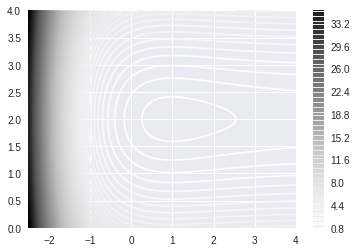

In [0]:
plt.contour(x0, x1, fharder([x0,x1]), 100)
plt.colorbar()

####Testing `multi_newton` on the new test function

[1.8, -2.1983358501279326, -1.4365352011962584, -0.7274950710460142, -0.0941298905775868, 0.42835729020751223, 0.7920926146505111, 0.9642127195718708, 0.9987703048382844, 0.9999985711336329, 0.9999999998775031, 1.0000000000284008] [2.8, 1.9998713237523558, 2.000000045209486, 1.999999999916413, 2.000000000027438, 1.9999999999719271, 1.9999999999996825, 1.9999999999996825, 1.9999999999996825, 1.9999999999996825, 1.9999999999996825, 1.9999999999996825]
10 iterations


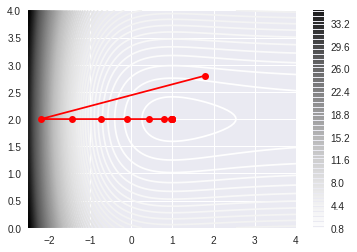

In [0]:
minx, x0points, x1points, i = multi_newton(fharder, [1.8, 2.8], want_points = True)

plt.contour(x0, x1, fharder([x0,x1]), 100)
plt.colorbar()

print(x0points, x1points)
print(i, "iterations")
plt.plot(x0points, x1points, "-or")

[1.8, -0.1991679250639662, 0.073482862798525, 0.31394385864356333, 0.5173858779995365, 0.6801412233718552, 0.8013164232722164, 0.8841951502963147, 0.936087885014773, 0.9661263182527479, 0.9825086520799083, 0.9911046419509278, 0.9955129871184345, 0.9977464048692943, 0.998870676763541, 0.9994346257323804, 0.9997171796968061, 0.9998585472130178, 0.9999292742800063, 0.9999646350223117, 0.9999823184386388, 0.9999911582093087, 0.9999955795478735, 0.9999977897485677, 0.9999988949243637, 0.9999994474705727] [2.8, 2.3999356618761776, 2.199968957554659, 2.0999869916109732, 2.049990954168644, 2.024995271015029, 2.0124975324747068, 2.0062487147331964, 2.003124374965232, 2.0015621746099574, 2.000781080864728, 2.000390542631638, 2.000195272418754, 2.000097635409164, 2.000048817970434, 2.0000244091192307, 2.0000122046311795, 2.000006102267773, 2.000003051156168, 2.0000015255583774, 2.00000076277336, 2.0000003813808513, 2.0000001906872433, 2.000000095346055, 2.000000047661583, 2.0000000238335556]
24 i

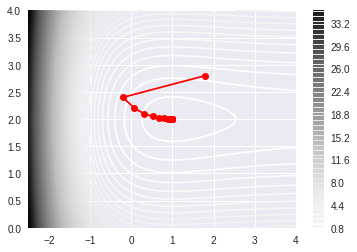

In [0]:
minx, x0points, x1points, i = multi_newton(fharder, [1.8, 2.8], want_points = True, gamma = 0.5)

plt.contour(x0, x1, fharder([x0,x1]), 100)
plt.colorbar()

print(x0points, x1points)
print(i, "iterations")
plt.plot(x0points, x1points, "-or")

## Gradient-Descent Algorithm

We have seen how the Hessian can both improve and degrade the performance of the multi-dimensional Newton's algorithm. In the gradient descent algorithm, we just use the gradient and (essentially) set the Hessian to an identity matrix.

$$ \Delta\vec{x} = - \nabla f(\vec{x}) $$

In [0]:
def multi_gradient(f, xguess, h = 1e-6, accuracy = 1e-6, nmax = 100, want_points = False, debug = False, gamma = 1.0):
    xbar = ml.matrix(xguess, dtype = np.float64).T # to get a column vector
    xpoints = [xbar.A1[0]]
    ypoints = [xbar.A1[1]]
    for i in range(nmax):
        grad = gradient(f, xbar.A1) # to get a column vector
        if debug:
            print("=========")
            print("iteration: ", i)
            print("xbar =", xbar)
            print("grad =", grad)
        x = xbar - gamma * grad
        if debug: print("x =", x)
        xpoints.append(x.A1[0])
        ypoints.append(x.A1[1])
        if np.sum((x.A1 - xbar.A1)**2) < accuracy**2:
            if not want_points:
                return x.A1
            else:
                return x.A1, xpoints, ypoints, i
        else:
            xbar = x
    raise ArithmeticError("Failed to converge")

#### A somewhat more difficult test function: $ f(\vec{x}) = 1 - x_0 e^{-x_0} + (x_1 - 2)^2 $



In [0]:
fharder = lambda x : 1 - x[0] * np.exp(-x[0]) + (x[1] - 2)**2
x0, x1 = np.mgrid[-2.5:4:101j, 0:4:101j]

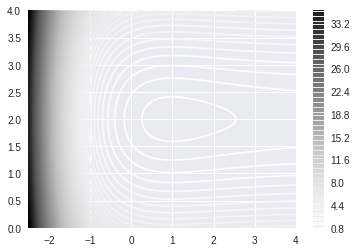

In [0]:
plt.contour(x0, x1, fharder([x0,x1]), 100)
plt.colorbar()

####Testing `multi_gradient` on the new test function

[1.8, 1.7537163112683924, 1.7080446676014145, 1.6631355701772528, 1.619142956233864, 1.5762215315000312, 1.5345237246371142, 1.4941963598062753, 1.4553771802354494, 1.4181913887866033, 1.3827483919630386, 1.349138940654891, 1.3174328470876058, 1.2876774265073483, 1.2598967620496044, 1.2340918310853362, 1.210241466057947, 1.1883040622255632, 1.1682198946354234, 1.1499138740166155, 1.1332985574051586, 1.118277234444663, 1.104746929851273, 1.0926011934624154, 1.0817325846106158, 1.0720347944008541, 1.0634043815858958, 1.0557421255173767, 1.0489540199147591, 1.0429519443087882, 1.0376540584482215, 1.0329849667460629, 1.028875699142094, 1.0252635513390047, 1.0220918218321924, 1.019309478373785, 1.0168707799250483, 1.0147348753912528, 1.012865395692429, 1.011230050866206, 1.009800241509183, 1.0085506900357795, 1.007459095854067, 1.006505816226609, 1.0056735736711826, 1.0049471896682356, 1.0043133439173497, 1.0037603576078287, 1.00327799945996, 1.002857312730064, 1.0024904611198633, 1.0021705

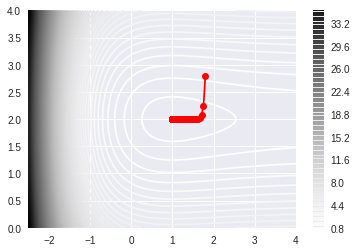

In [0]:
minx, x0points, x1points, niter = multi_gradient(fharder, [1.8, 2.8], want_points = True, gamma = 0.35)

plt.contour(x0, x1, fharder([x0,x1]), 100)
plt.colorbar()

print(x0points, x1points)
print(niter, "iterations")
plt.plot(x0points, x1points, "-or")

[1.8, 1.7404924002022188, 1.6820340069760615, 1.624949210636138, 1.5695694898020014, 1.516223243881319, 1.4652241240041592, 1.416858589826518, 1.3713736733182753, 1.3289660817798794, 1.289773759292488, 1.2538708251667903, 1.2212664315318407, 1.1919075995413293, 1.1656856007190337, 1.1424450477869093, 1.1219946251066244, 1.1041183455999566, 1.088586349660557, 1.0751645029265273, 1.0636223375530591, 1.0537391548808046, 1.0453083265703251, 1.0381399816027133, 1.0320623478314623, 1.026922043274457, 1.022583599695069, 1.0189284660243365, 1.0158536939623748, 1.0132704624336892, 1.011102554680375, 1.009284867379699, 1.0077620024955032, 1.0064869712898867, 1.0054200245339413, 1.0045276125396392, 1.003781471415753, 1.0031578276541204, 1.0026367109293484, 1.0022013640458056, 1.001837738915799, 1.0015340676276836, 1.001280498511979, 1.0010687887122878, 1.0008920442931875, 1.0007445018399326, 1.0006213444306618, 1.0005185473847862, 1.000432748566736, 1.0003611398477814, 1.0003013762786879, 1.00025

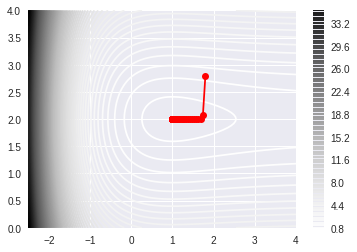

In [0]:
minx, x0points, x1points, niter = multi_gradient(fharder, [1.8, 2.8], want_points = True, gamma = 0.45)

plt.contour(x0, x1, fharder([x0,x1]), 100)
plt.colorbar()

print(x0points, x1points)
print(niter, "iterations")
plt.plot(x0points, x1points, "-or")

[1.8, 1.700820667003698, 1.6048781443271694, 1.513731762385205, 1.428932450229657, 1.3518646986741862, 1.2835790275149457, 1.2246561315358602, 1.1751432571520433, 1.134583396556897, 1.1021263170328572, 1.0766842989988519, 1.0570881981734932, 1.0422110383361034, 1.031045985162436, 1.0227419509521758, 1.016608317850752, 1.0121014011359215, 1.0088026703890292, 1.0063952148624307, 1.004641962152751, 1.003367131828113, 1.0024412308055937, 1.0017693141582724, 1.0012820063808088, 1.0009287417132902, 1.0006727308341274, 1.0004872427925344, 1.0003528733186535, 1.0002555465053782, 1.0001850568079658, 1.0001340073100036, 1.0000970383820846, 1.000070267171836, 1.000050881179025, 1.0000368432831792, 1.0000266782060658, 1.000019317593946, 1.0000139877740273, 1.0000101284445047, 1.000007333929885, 1.0000053104651558, 1.0000038452621969, 1.0000027843191968, 1.0000020161003749] [2.8, 1.6000000001320265, 2.199999999941113, 1.9000000000573865, 2.049999999978433, 1.9750000000179098, 2.0124999999981714, 1.

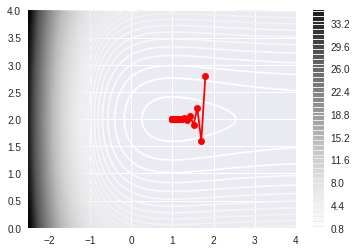

In [0]:
minx, x0points, x1points, niter = multi_gradient(fharder, [1.8, 2.8], want_points = True, gamma = 0.75)

plt.contour(x0, x1, fharder([x0,x1]), 100)
plt.colorbar()

print(x0points, x1points)
print(niter, "iterations")
plt.plot(x0points, x1points, "-or")

#### Gradient descent with automatic determination of $\gamma_n$ in each step: Barzilai-Borwein method

Try to get $\gamma_n$ to approximate the effect of the Hessian for faster convergence:

$$ \vec{x}_{n+1} = \vec{x}_n + \gamma_n \nabla f(\vec{x}_n) $$

$$ \gamma_n = \frac{(\bar{x}_n - \bar{x}_{n-1})^T (\nabla f(\bar{x}_n) - \nabla f(\bar{x}_{n-1}))}{(\nabla f(\bar{x}_n) - \nabla f(\bar{x}_{n-1}))^T  (\nabla f(\bar{x}_n) - \nabla f(\bar{x}_{n-1}))} $$

In [0]:
def multi_gradient_improved(f, xguess, h = 1e-6, accuracy = 1e-6, nmax = 100, want_points = False, debug = False, gamma = 1.0):
    xbar = ml.matrix(xguess, dtype = np.float64).T # to get a column vector
    xbars = []
    grads = []
    gammas = []
    for i in range(nmax):
        grad = gradient(f, xbar.A1)        

        xbars.append(xbar.A1[:])
        grads.append(grad.A1[:])
        gammas.append(gamma)

        x = xbar - gamma * grad

        if debug:
            print("=========")
            print("iteration: ", i)
            print("xbar =", xbar)
            print("grad =", grad)
            print("gamma =", gamma)
            print("x =", x)

        if (i > 0):
            graddiff = (grads[i] - grads[i-1])
            xbardiff = (xbars[i] - xbars[i-1])
            gamma = xbardiff.dot(graddiff) / graddiff.dot(graddiff)
            if debug:
                print("grads =", grads)
                print("xbars =", xbars)
                print("graddiff =", graddiff)
                print("xbardiff =", xbardiff)

        if np.sum((x.A1 - xbar.A1)**2) < accuracy**2:
            if not want_points:
                return x.A1
            else:
                return x.A1, xbars, grads, gammas, i
        else:
            xbar = x
    raise ArithmeticError("Failed to converge")

[array([1.2, 2.8]), array([1.18494029, 2.4       ]), array([1.17080325, 2.2       ]), array([1.14431465, 1.99996952]), array([1.12132403, 2.00000002]), array([1.10151763, 2.        ]), array([0.98074717, 2.        ]), array([1.00543746, 2.        ]), array([0.99957168, 2.        ]), array([0.99999428, 1.99999998]), array([1.00000003, 2.00000009])]
[0.25, 0.25, 0.5000762015762789, 0.500276179978694, 0.5010067490801839, 3.579334498504879, 3.419516717420768, 2.948393747158124, 2.680846297434565, 2.731929025902096, 2.717100736167118]
10 iterations


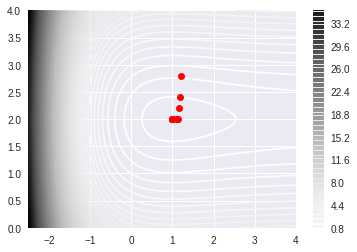

In [0]:
minx, xbars, grads, gammas, niter = multi_gradient_improved(fharder, [1.2, 2.8], want_points = True, gamma = 0.25)

plt.contour(x0, x1, fharder([x0,x1]), 100)
plt.colorbar()

print(xbars)
print(gammas)
print(niter, "iterations")
for i in range(len(xbars)):
    plt.plot(xbars[i][0], xbars[i][1], "-or")

### Levenberg-Marquardt Algorithm

This is used in the `scipy.optimize.leastsq` routine.

We want to minimize a sum of squares:

$$ \S \sum_i^N (y_i -f(x_i,\theta))^2 $$

#### Minimization methods for multidimensional curve fitting: a specific subset of a general problem

We want to determine the minimum of the function $\chi^2(\{\vec{x}_i\}, \{y_i\}, \{\delta y_i\}, \vec{\theta})$ for a set of data points $\{y_i\}$ at a set of independent variables $\{\vec{x}_i\}$. We want this minimum by changing the parameter vector $\vec{\theta}$.

$$ \chi^2(\{\vec{x}_i\}, \{y_i\}, \vec{\theta}) = \sum_i \frac{\big(y_i - f(\vec{x}_i, \theta)\big)^2}{\delta y_i^2} $$

We want to find $\vec{\theta}$ such that $\chi^2$ is minimized. Think of $\chi^2$ as a function of $\vec{\theta}$ only, with given $\{\vec{x}_i\}, \{y_i\}$.

Let's create a set of independent variables, $\vec{x}_i$
.

In [0]:
N = 100 # number of observations
D = 1 # dimensionality of independent variables

x = np.random.rand(N, D)
print(x[:10])

[[0.92608954]
 [0.98797755]
 [0.81490485]
 [0.9996312 ]
 [0.43207811]
 [0.14091996]
 [0.22573101]
 [0.77034418]
 [0.87600054]
 [0.03899415]]


Let's now create a set of observations, $y_i$, based on an exact linear dependence.

$$ y_i = f(\vec{x}_i,\vec{\theta}) = \sum_{k=0}^{D-1} \theta_k (\vec{x}_i)_k + \theta_D = \vec\theta \cdot \vec{x}_i + \theta_D$$

In [0]:
theta_exact = [2.0] * D + [3.0]
print(theta_exact)

[2.0, 3.0]


[4.85217908 4.97595509 4.62980971 4.99926239 3.86415623 3.28183992
 3.45146202 4.54068837 4.75200109 3.07798829]


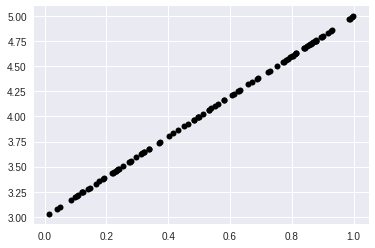

In [0]:
def f(x, theta):
  # x has shape (N,D), theta has shape (D+1,), should return (1)
  sum = theta[D]
  for k in range(D):
    sum += np.array(x[:,k] * theta[k])
  return sum

y_exact = f(x, theta_exact)

print(y_exact[:10])
plt.plot(x[:,0], y_exact, 'ok', ms = 6)

[5.56127305 5.59660122 4.68967255 5.07339748 3.65708799 3.15409277
 3.9289097  4.67212845 5.19303375 2.81979566]


<Container object of 3 artists>

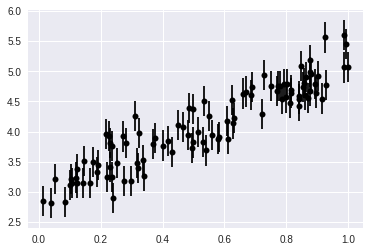

In [0]:
delta_y = 0.25 # measurement uncertainty on y
y_observed = np.random.normal(y_exact, delta_y)

print(y_observed[:10])
plt.errorbar(x[:,0], y_observed, delta_y, None, 'ok', ms = 6)

In [0]:
def chi2(theta):
  y_predicted = theta[D]
  for k in range(D):
    y_predicted += x[:,k] * theta[k]
  return np.sum((y_predicted - y_observed)**2 / delta_y**2)

In [0]:
print(theta_exact)
print(chi2(theta_exact))

[2.0, 3.0]
111.43589384045738


In [0]:
theta0, theta1 = np.mgrid[-4.0:4.0:51j, -4.0:4.0:51j]
chi2([theta0,theta1])

In [0]:
theta0, theta1 = np.mgrid[-4.0:4.0:51j, -4.0:4.0:51j]
chi2pts = [chi2([itheta0, jtheta1]) for itheta0, jtheta1 in zip(theta0, theta1)]
print(chi2pts)
#chi2(theta[0])

In [0]:
plt.contour(theta0, theta1, chi2([theta0, theta1]), 100)
plt.colorbar()